<a href="https://colab.research.google.com/github/kevinegan31/Data-Science-Projects/blob/main/Engineering_Graduate_Salary/Engineering_Graduate_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
# Check for duplicates
df.duplicated().sum()

0

# Feature Engineering

In [5]:
# Let's get the ages of each student
from datetime import date
now=date.today()
now=pd.to_datetime(now)

df["DOB"]=pd.to_datetime(df["DOB"])

df["Age"]=df["DOB"].apply(lambda x: ((now-x)/365).days)

df["DOB"]=(df["DOB"].apply(lambda x:int(x.year)))

df['Graduation_age'] = df.apply( lambda x: x['GraduationYear']-x['DOB'], axis=1)

In [6]:
df_update1 = df.drop(['ID','DOB',
              'CollegeID','CollegeState',
              'CollegeCityID','CollegeCityTier',
              'GraduationYear','12graduation',
              '10board','12board'], axis = 1)

In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

check_df(df_update1)

##################### Shape #####################
(2998, 26)
##################### Types #####################
Gender                    object
10percentage             float64
12percentage             float64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscientiousness        float64
agreeableness            float64
extraversion             float64
nueroticism              float64
openess_to_experience    float64
Salary                     int64
Age                        int64
Graduation_age             int64
dtype: object
#################

In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Gives the names of categorical, numeric, and cardinal but categorical variables in the dataset.
    Note: Numeric-looking categorical variables are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for numeric but categorical variables
        car_th: int, optional
                Class threshold value for cardinal but categorical variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numeric variables
        cat_but_car: list
                List of cardinal-looking categorical variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [9]:
cat_cols,num_cols,cat_but_car=grab_col_names(df_update1)

Observations: 2998
Variables: 26
cat_cols: 3
num_cols: 22
cat_but_car: 1
num_but_cat: 1


In [10]:
num_cols

['10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Salary',
 'Age',
 'Graduation_age']

In [11]:
cat_cols

['Gender', 'Degree', 'CollegeTier']

In [12]:
cat_but_car

['Specialization']

In [13]:
df_update1["Specialization"].nunique()


42

In [14]:
cat_cols.append("Specialization")

In [15]:
cat_cols

['Gender', 'Degree', 'CollegeTier', 'Specialization']

# Analysis of Numerical Variables

In [16]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count   2998.000
mean      77.666
std       10.003
min       43.000
5%        59.000
10%       64.000
20%       69.000
30%       73.000
40%       76.000
50%       78.965
60%       81.500
70%       84.140
80%       86.818
90%       89.800
95%       91.600
99%       94.400
max       97.760
Name: 10percentage, dtype: float64


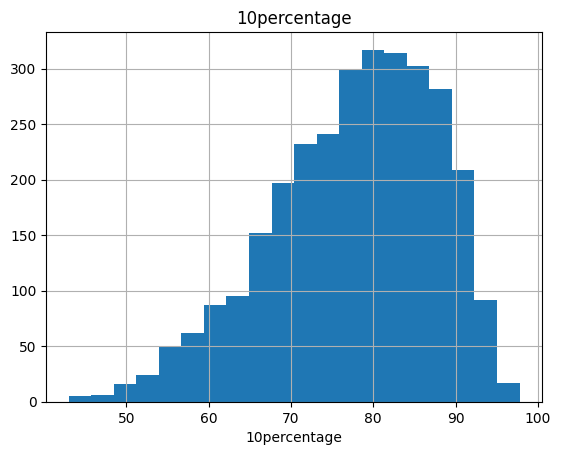

count   2998.000
mean      74.341
std       11.120
min       40.000
5%        56.000
10%       60.200
20%       64.000
30%       68.000
40%       71.000
50%       74.000
60%       77.160
70%       81.000
80%       85.000
90%       89.800
95%       93.000
99%       96.000
max       98.700
Name: 12percentage, dtype: float64


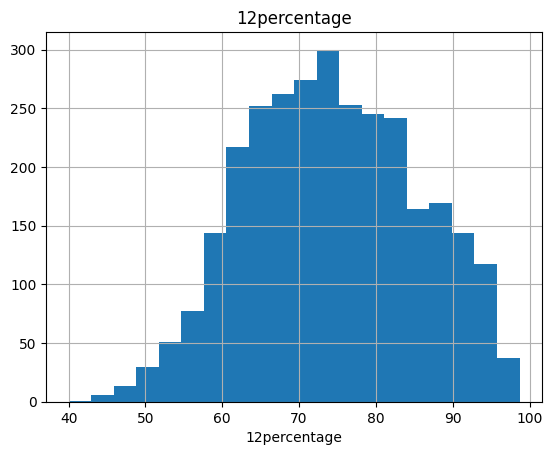

count   2998.000
mean      71.510
std        8.122
min        6.630
5%        60.000
10%       62.000
20%       65.154
30%       67.720
40%       70.000
50%       71.800
60%       73.400
70%       75.400
80%       77.700
90%       81.000
95%       84.000
99%       90.000
max       99.930
Name: collegeGPA, dtype: float64


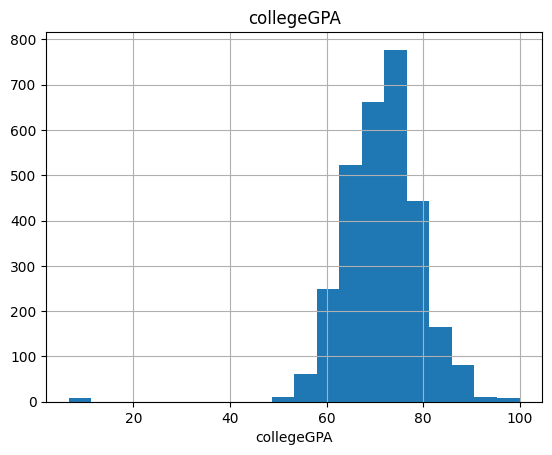

count   2998.000
mean     501.066
std      105.305
min      180.000
5%       335.000
10%      365.000
20%      405.000
30%      440.000
40%      475.000
50%      500.000
60%      525.000
70%      555.000
80%      590.000
90%      640.000
95%      675.000
99%      755.000
max      875.000
Name: English, dtype: float64


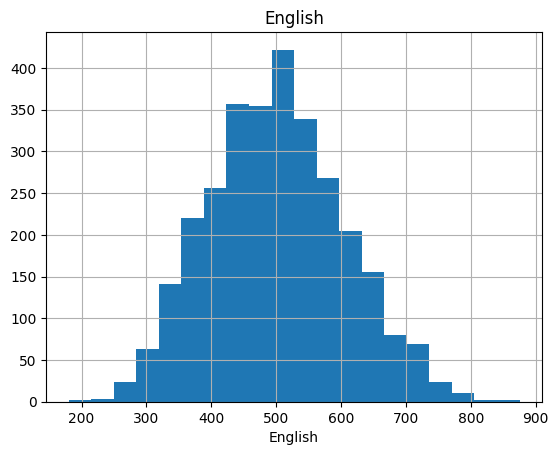

count   2998.000
mean     500.432
std       87.300
min      195.000
5%       350.000
10%      385.000
20%      425.000
30%      455.000
40%      480.000
50%      505.000
60%      525.000
70%      555.000
80%      580.000
90%      610.000
95%      640.000
99%      675.000
max      795.000
Name: Logical, dtype: float64


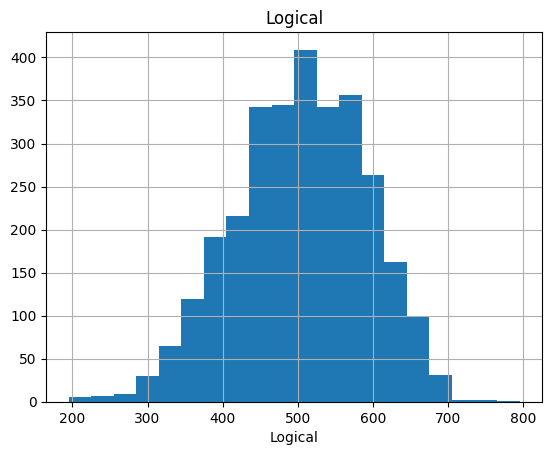

count   2998.000
mean     514.138
std      122.195
min      120.000
5%       310.000
10%      355.000
20%      405.000
30%      450.000
40%      485.000
50%      515.000
60%      545.000
70%      579.500
80%      615.000
90%      665.000
95%      715.000
99%      800.300
max      900.000
Name: Quant, dtype: float64


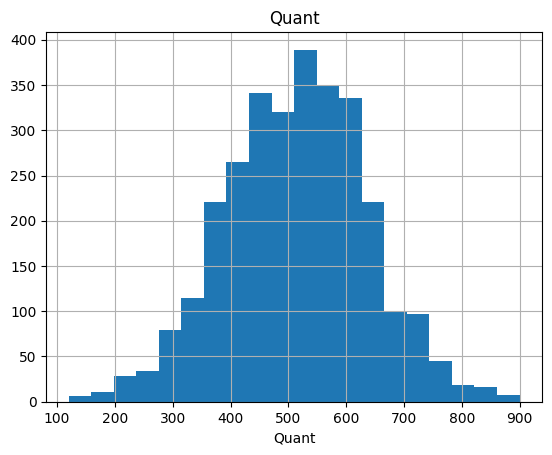

count   2998.000
mean       0.508
std        0.463
min       -1.000
5%        -1.000
10%        0.112
20%        0.245
30%        0.376
40%        0.494
50%        0.623
60%        0.694
70%        0.794
80%        0.865
90%        0.945
95%        0.979
99%        0.997
max        1.000
Name: Domain, dtype: float64


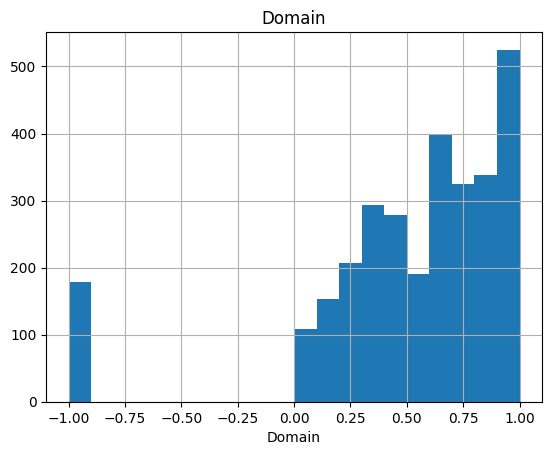

count   2998.000
mean     351.869
std      204.526
min       -1.000
5%        -1.000
10%       -1.000
20%       -1.000
30%      335.000
40%      385.000
50%      415.000
60%      445.000
70%      475.000
80%      515.000
90%      555.000
95%      605.000
99%      665.300
max      804.000
Name: ComputerProgramming, dtype: float64


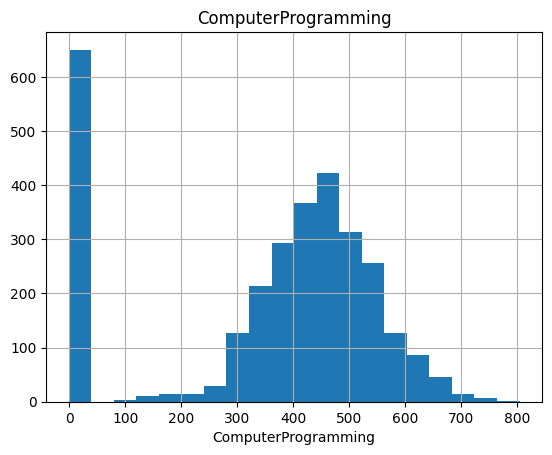

count   2998.000
mean      96.228
std      158.738
min       -1.000
5%        -1.000
10%       -1.000
20%       -1.000
30%       -1.000
40%       -1.000
50%       -1.000
60%       -1.000
70%       -1.000
80%      292.000
90%      366.000
95%      400.000
99%      500.000
max      612.000
Name: ElectronicsAndSemicon, dtype: float64


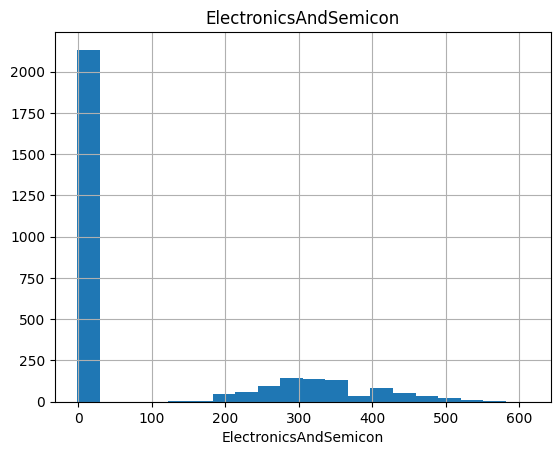

count   2998.000
mean      94.147
std      177.785
min       -1.000
5%        -1.000
10%       -1.000
20%       -1.000
30%       -1.000
40%       -1.000
50%       -1.000
60%       -1.000
70%       -1.000
80%      315.000
90%      407.000
95%      469.000
99%      561.930
max      715.000
Name: ComputerScience, dtype: float64


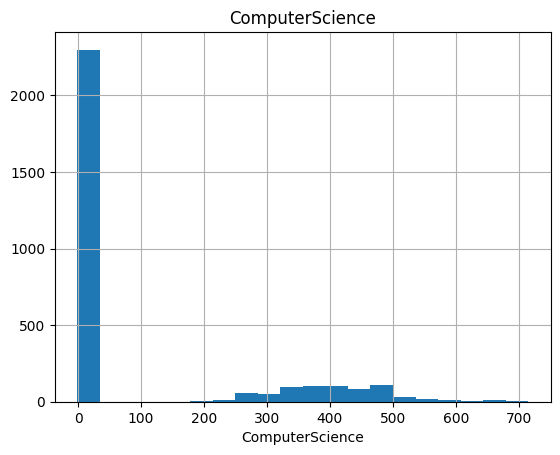

count   2998.000
mean      24.139
std       99.785
min       -1.000
5%        -1.000
10%       -1.000
20%       -1.000
30%       -1.000
40%       -1.000
50%       -1.000
60%       -1.000
70%       -1.000
80%       -1.000
90%       -1.000
95%      340.000
99%      473.000
max      623.000
Name: MechanicalEngg, dtype: float64


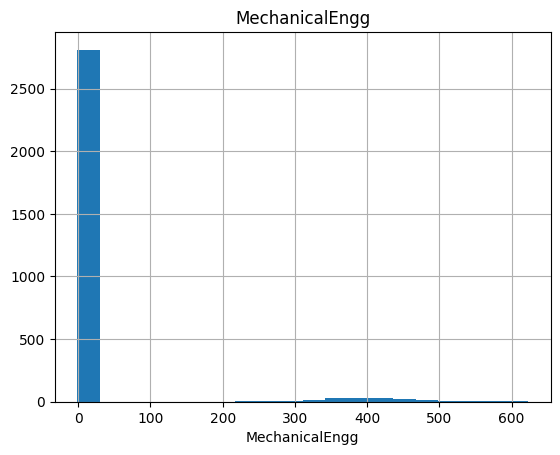

count   2998.000
mean      16.268
std       86.055
min       -1.000
5%        -1.000
10%       -1.000
20%       -1.000
30%       -1.000
40%       -1.000
50%       -1.000
60%       -1.000
70%       -1.000
80%       -1.000
90%       -1.000
95%       -1.000
99%      473.330
max      660.000
Name: ElectricalEngg, dtype: float64


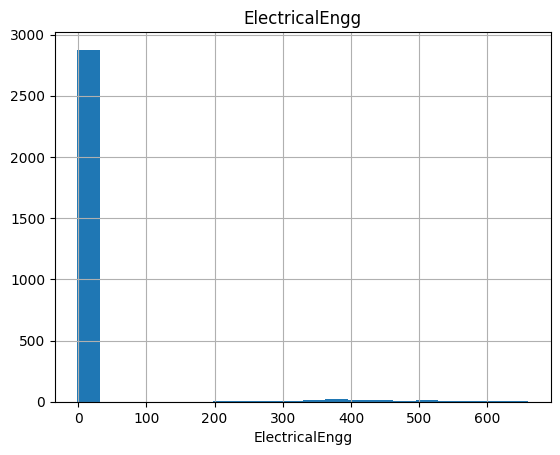

count   2998.000
mean      31.068
std      103.553
min       -1.000
5%        -1.000
10%       -1.000
20%       -1.000
30%       -1.000
40%       -1.000
50%       -1.000
60%       -1.000
70%       -1.000
80%       -1.000
90%       -1.000
95%      340.000
99%      446.000
max      548.000
Name: TelecomEngg, dtype: float64


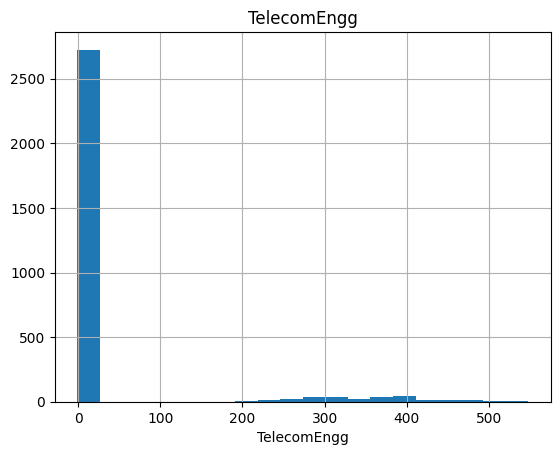

count   2998.000
mean       1.947
std       32.242
min       -1.000
5%        -1.000
10%       -1.000
20%       -1.000
30%       -1.000
40%       -1.000
50%       -1.000
60%       -1.000
70%       -1.000
80%       -1.000
90%       -1.000
95%       -1.000
99%       -1.000
max      500.000
Name: CivilEngg, dtype: float64


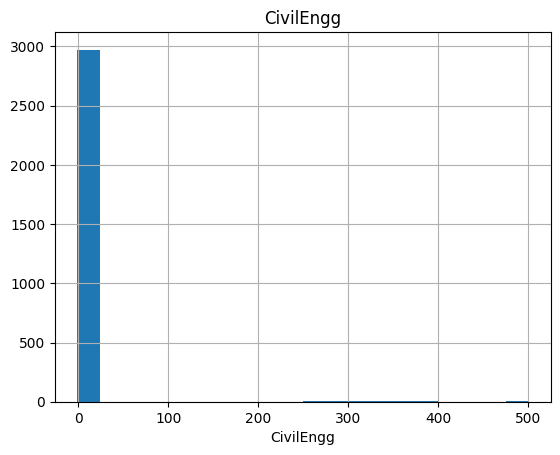

count   2998.000
mean      -0.039
std        1.025
min       -3.893
5%        -1.808
10%       -1.452
20%       -0.877
30%       -0.446
40%       -0.263
50%        0.046
60%        0.272
70%        0.559
80%        0.846
90%        1.277
95%        1.437
99%        1.852
max        1.995
Name: conscientiousness, dtype: float64


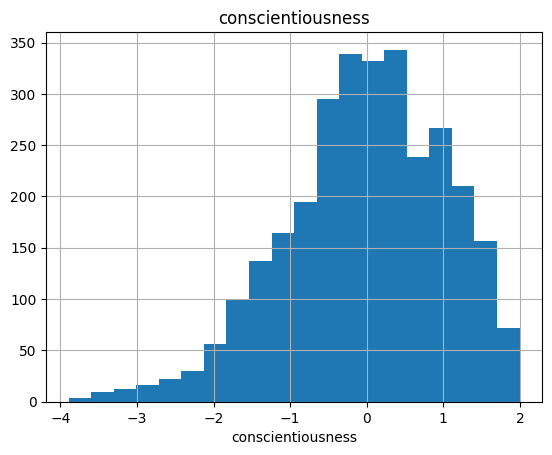

count   2998.000
mean       0.126
std        0.956
min       -5.782
5%        -1.619
10%       -1.059
20%       -0.591
30%       -0.279
40%        0.046
50%        0.212
60%        0.501
70%        0.712
80%        0.878
90%        1.211
95%        1.378
99%        1.711
max        1.905
Name: agreeableness, dtype: float64


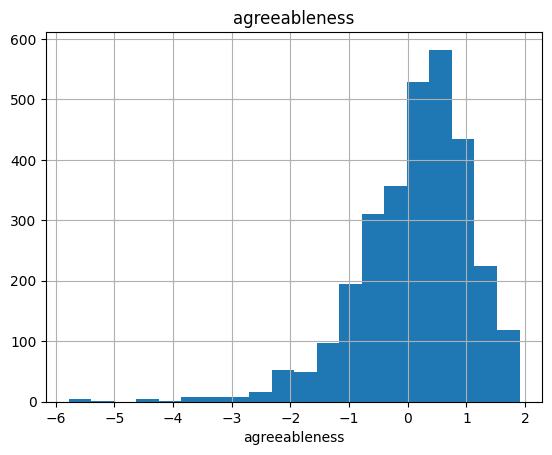

count   2998.000
mean      -0.009
std        0.963
min       -4.601
5%        -1.681
10%       -1.220
20%       -0.779
30%       -0.451
40%       -0.163
50%        0.091
60%        0.317
70%        0.527
80%        0.778
90%        1.198
95%        1.398
99%        1.978
max        2.162
Name: extraversion, dtype: float64


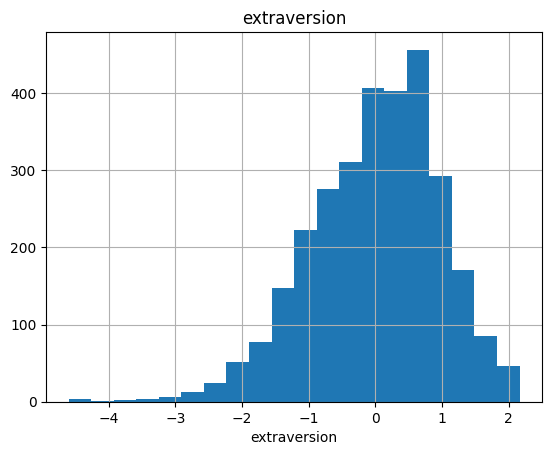

count   2998.000
mean      -0.146
std        1.013
min       -2.643
5%        -1.756
10%       -1.465
20%       -0.995
30%       -0.742
40%       -0.437
50%       -0.173
60%        0.062
70%        0.400
80%        0.767
90%        1.160
95%        1.540
99%        2.295
max        3.353
Name: nueroticism, dtype: float64


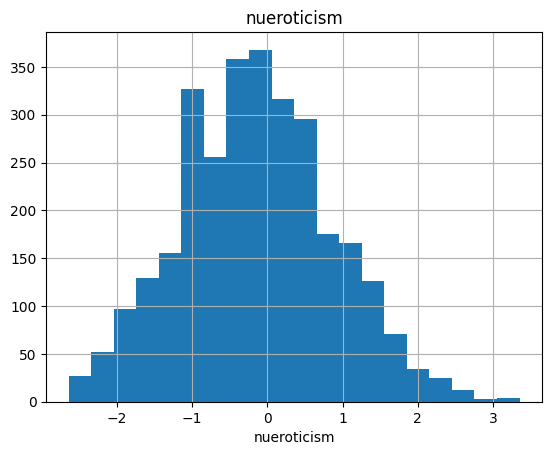

count   2998.000
mean      -0.141
std        1.007
min       -7.376
5%        -1.819
10%       -1.244
20%       -0.861
30%       -0.478
40%       -0.286
50%       -0.094
60%        0.186
70%        0.480
80%        0.672
90%        0.976
95%        1.247
99%        1.608
max        1.630
Name: openess_to_experience, dtype: float64


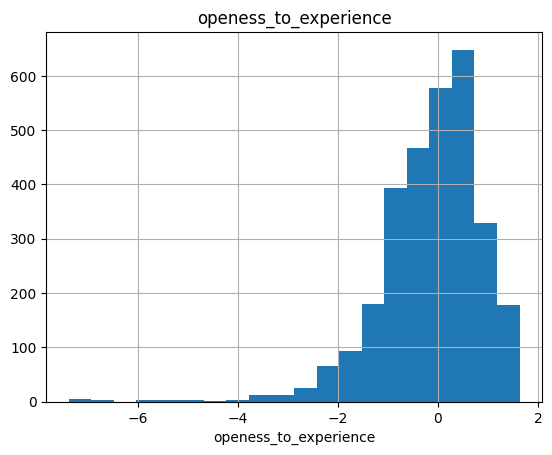

count      2998.000
mean     305174.783
std      212331.194
min       35000.000
5%       100000.000
10%      120000.000
20%      180000.000
30%      200000.000
40%      240000.000
50%      300000.000
60%      320000.000
70%      350000.000
80%      400000.000
90%      480000.000
95%      560000.000
99%      880600.000
max     4000000.000
Name: Salary, dtype: float64


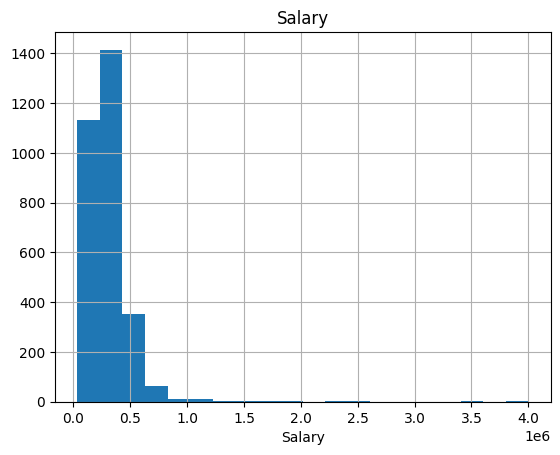

count   2998.000
mean      32.529
std        1.753
min       26.000
5%        30.000
10%       31.000
20%       31.000
30%       31.000
40%       32.000
50%       32.000
60%       33.000
70%       33.000
80%       34.000
90%       35.000
95%       36.000
99%       38.000
max       42.000
Name: Age, dtype: float64


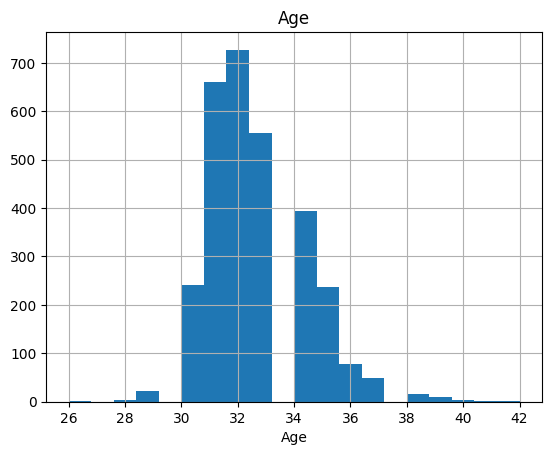

count    2998.000
mean       21.513
std        36.786
min     -1991.000
5%         21.000
10%        21.000
20%        21.000
30%        22.000
40%        22.000
50%        22.000
60%        22.000
70%        22.000
80%        23.000
90%        24.000
95%        24.000
99%        26.000
max        29.000
Name: Graduation_age, dtype: float64


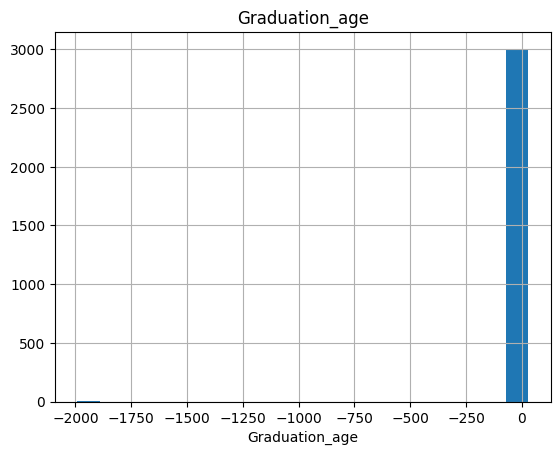

In [17]:
for col in num_cols:
    num_summary(df_update1, col, plot=True)

In [18]:
df[df.Graduation_age<=0]

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,Graduation_age
961,794381,m,1991,89.000,cbse,2010,85.200,cbse,8346,2,B.Tech/B.E.,mechanical engineering,68.760,8346,0,Uttar Pradesh,0,695,655,680,0.755,-1,-1,-1,446,-1,-1,-1,1.134,0.379,-0.297,-0.361,-1.244,325000,31,-1991


In [19]:
# Calculate the mean of the non-negative values in 'Graduation_age'
mean_grad_age = df[df['Graduation_age'] > 0]['Graduation_age'].mean()
mean_grad_age


22.18485151818485

In [20]:
# Replace negative values in 'Graduation_age' with the mean
df_update1.loc[df['Graduation_age'] <= 0, 'Graduation_age'] = round(mean_grad_age, 0)

count   2998.000
mean      22.185
std        1.163
min       17.000
5%        21.000
10%       21.000
20%       21.000
30%       22.000
40%       22.000
50%       22.000
60%       22.000
70%       22.000
80%       23.000
90%       24.000
95%       24.000
99%       26.000
max       29.000
Name: Graduation_age, dtype: float64


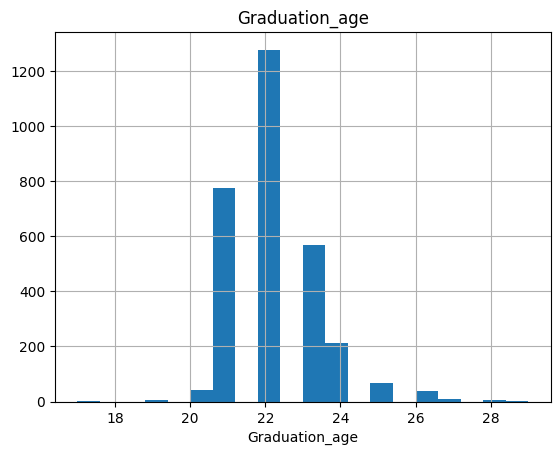

In [21]:
num_summary(df_update1, 'Graduation_age', plot=True)

College GPA has several observations well below 40

Domain, Computer Programming, Electronics and Semcon, CompSci, MechanicalEngg, TelecomEngg, CivilEngg, ElectricalEngg all have -1 values (NA values)

Conscientiousness, Agreeableness, extraversion, open to experience all left-skewed

Salary - right-skewed


# Categorical Variable Summary

In [22]:
def cat_summary(dataframe, col_name, plot=False):
    display(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


for col in cat_cols:
    cat_summary(df_update1, col)
    print("")

,Gender,Ratio
m,2282,76.117
f,716,23.883


,Degree,Ratio
B.Tech/B.E.,2757,91.961
MCA,200,6.671
M.Tech./M.E.,40,1.334
M.Sc. (Tech.),1,0.033


,CollegeTier,Ratio
2,2772,92.462
1,226,7.538


,Specialization,Ratio
electronics and communication engineering,670,22.348
computer science & engineering,557,18.579
information technology,506,16.878
computer engineering,415,13.843
computer application,201,6.704
mechanical engineering,155,5.170
electronics and electrical engineering,148,4.937
electronics & telecommunications,89,2.969
electrical engineering,63,2.101
electronics & instrumentation eng,24,0.801


#Analysis of Categorical Variables compared to Target

In [23]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df_update1,"Salary",col)

        TARGET_MEAN
Gender             
f        290418.994
m        309804.557


               TARGET_MEAN
Degree                    
B.Tech/B.E.     306595.575
M.Sc. (Tech.)   460000.000
M.Tech./M.E.    335375.000
MCA             278775.000


             TARGET_MEAN
CollegeTier             
1             437500.000
2             294386.364


                                             TARGET_MEAN
Specialization                                          
aeronautical engineering                      148333.333
applied electronics and instrumentation       230000.000
automobile/automotive engineering             252500.000
biomedical engineering                        290000.000
biotechnology                                 251250.000
ceramic engineering                           335000.000
chemical engineering                          415000.000
civil engineering                             347333.333
computer and communication engineering        120000.000
computer application     

#Analysis of Numerical Variables compared to Target

In [24]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}).head(15), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df_update1, "Salary", col)

        10percentage
Salary              
35000         86.433
40000         71.600
45000         69.000
50000         73.150
55000         75.060
60000         69.380
65000         77.133
70000         75.592
75000         83.252
80000         71.268
85000         68.638
90000         76.979
95000         73.126
100000        73.659
105000        71.386


        12percentage
Salary              
35000         80.333
40000         76.330
45000         72.933
50000         72.400
55000         63.400
60000         69.877
65000         75.067
70000         64.164
75000         81.298
80000         66.467
85000         64.841
90000         71.273
95000         69.048
100000        70.850
105000        69.922


        collegeGPA
Salary            
35000       81.213
40000       74.000
45000       70.320
50000       70.162
55000       68.410
60000       74.538
65000       71.167
70000       73.920
75000       77.556
80000       68.266
85000       64.606
90000       68.907
95000       69.3

In [25]:
# Log transform salary
# Adding a small constant to avoid taking log of zero (if there are zero salaries)
df_update1['Log_Salary'] = np.log(df_update1['Salary'] + 1)

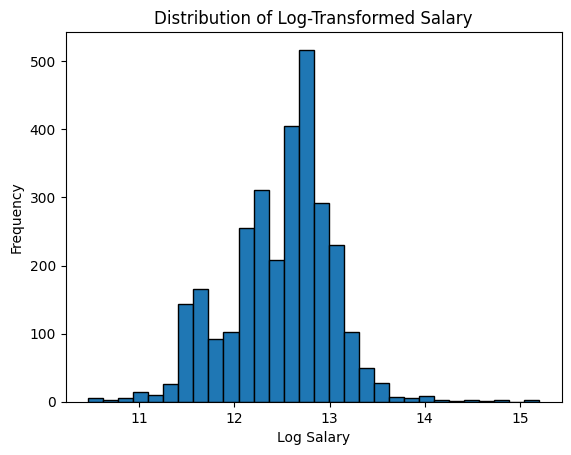

In [26]:
# Plotting the log-transformed salary
plt.hist(df_update1['Log_Salary'], bins=30, edgecolor='black')
plt.title('Distribution of Log-Transformed Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.show()

In [27]:
df_logSalary = df_update1.drop(['Salary'], axis=1)

In [28]:
# Store columns with less than 10 values in specialization to 'Other'
specialization = df_logSalary.Specialization.value_counts() #Store the values # in specialization
lessthan10 = specialization[specialization<=10]
def correctSpecialization(specialization):
    if specialization in lessthan10:
        return 'Other'
    else:
        return specialization

In [29]:
df_logSalary['Specialization'] = df_logSalary['Specialization'].apply(correctSpecialization)
df_logSalary['Specialization'].value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
Other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

In [30]:
# Let's look at the columns with -1 values
minus_one_col=[col for col in df_logSalary.columns if df_logSalary[col].min() == -1 ]
minus_one_col

['Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg']

In [31]:
# Calculate the mean of the 'Domain' column excluding the values that are -1
mean_domain = df_logSalary[df_logSalary['Domain'] != -1]['Domain'].mean()

print("Mean of 'Domain' excluding -1 values:", mean_domain)


Mean of 'Domain' excluding -1 values: 0.6042411529327208


In [32]:
# List of columns to subgroup by
subgroup_columns = ['Degree', 'Specialization', 'CollegeTier']

# Loop through each column and replace -1 in 'Domain' with the subgroup mean
for col in subgroup_columns:
    for category in df_logSalary[col].unique():
        # Calculate the mean of 'Domain' for the current category, excluding -1 values
        mean_domain = df_logSalary[(df_logSalary[col] == category) & (df_logSalary['Domain'] != -1)]['Domain'].mean()

        # Replace -1 in 'Domain' with the calculated mean for this category
        df_logSalary.loc[(df_logSalary[col] == category) & (df_logSalary['Domain'] == -1), 'Domain'] = mean_domain

# Check if there are any -1 values left in 'Domain'
remaining = (df_logSalary['Domain'] == -1).sum()
print(f"Remaining -1 values in 'Domain': {remaining}")

Remaining -1 values in 'Domain': 0


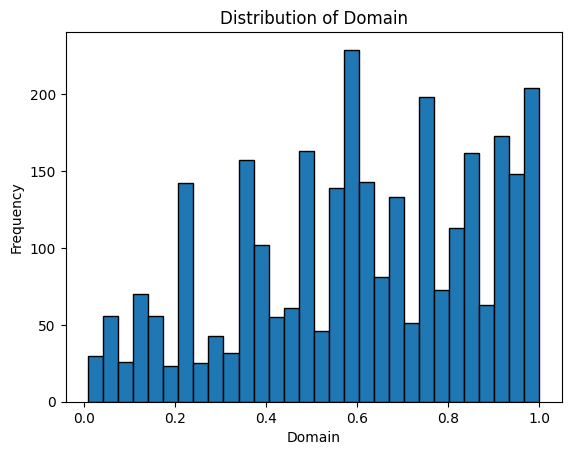

In [33]:
# Plotting the Domain salary
plt.hist(df_logSalary['Domain'], bins=30, edgecolor='black')
plt.title('Distribution of Domain')
plt.xlabel('Domain')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Do the same for the rest of the minus_one columns
variables_to_replace = minus_one_col[1:len(minus_one_col)]

# Loop through each variable and replace -1 with the subgroup mean
for variable in variables_to_replace:
    for col in subgroup_columns:
        for category in df_logSalary[col].unique():
            # Calculate the mean for the current category, excluding -1 values
            mean_value = df_logSalary[(df_logSalary[col] == category) & (df_logSalary[variable] != -1)][variable].mean()

            # Replace -1 in the variable with the calculated mean for this category
            df_logSalary.loc[(df_logSalary[col] == category) & (df_logSalary[variable] == -1), variable] = mean_value

    # Check if there are any -1 values left in the variable
    remaining = (df_logSalary[variable] == -1).sum()
    print(f"Remaining -1 values in '{variable}': {remaining}")


Remaining -1 values in 'ComputerProgramming': 0
Remaining -1 values in 'ElectronicsAndSemicon': 0
Remaining -1 values in 'ComputerScience': 0
Remaining -1 values in 'MechanicalEngg': 0
Remaining -1 values in 'ElectricalEngg': 0
Remaining -1 values in 'TelecomEngg': 0
Remaining -1 values in 'CivilEngg': 0


In [35]:
df_logSalary.isnull().sum()

Gender                     0
10percentage               0
12percentage               0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
English                    0
Logical                    0
Quant                      0
Domain                     1
ComputerProgramming        0
ElectronicsAndSemicon      1
ComputerScience            1
MechanicalEngg           201
ElectricalEngg           241
TelecomEngg              201
CivilEngg                201
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Age                        0
Graduation_age             0
Log_Salary                 0
dtype: int64

In [36]:
df_logSalary[df_logSalary['Domain'].isnull()==True]

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Graduation_age,Log_Salary
2746,m,73.000,47.200,1,M.Sc. (Tech.),Other,81.200,545,610,560,NaN,505.000,NaN,NaN,NaN,NaN,NaN,NaN,-0.303,-2.618,-1.988,-1.122,-1.436,32,22,13.039


count   2998.000
mean     449.088
std       85.771
min      105.000
5%       315.000
10%      345.000
20%      385.000
30%      425.000
40%      446.523
50%      446.523
60%      446.523
70%      475.000
80%      515.000
90%      555.000
95%      605.000
99%      665.300
max      804.000
Name: ComputerProgramming, dtype: float64


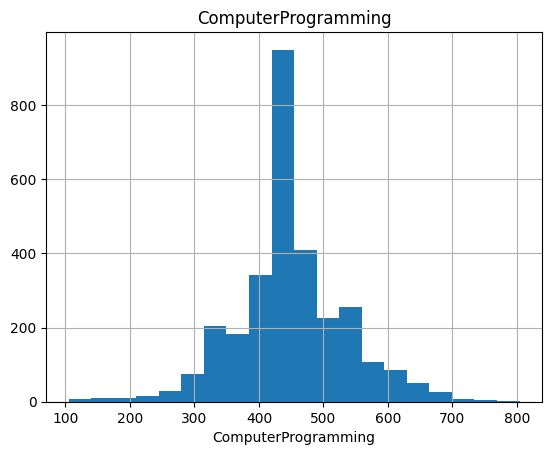

count   2997.000
mean     339.317
std       45.358
min      133.000
5%       266.000
10%      300.000
20%      335.374
30%      335.374
40%      335.374
50%      335.374
60%      335.374
70%      335.374
80%      335.374
90%      388.333
95%      400.000
99%      500.000
max      612.000
Name: ElectronicsAndSemicon, dtype: float64


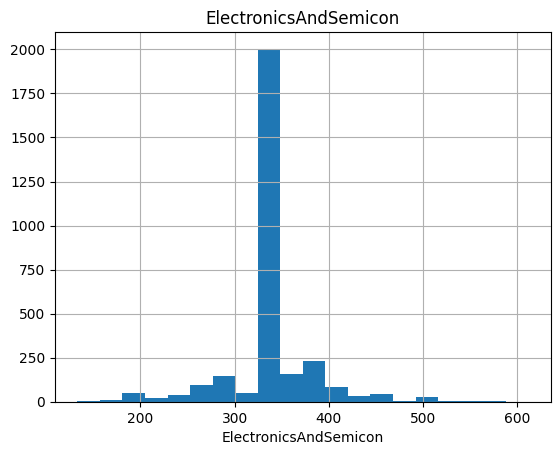

count   2997.000
mean     406.558
std       43.428
min      192.000
5%       346.000
10%      376.000
20%      407.000
30%      407.495
40%      407.495
50%      407.495
60%      407.495
70%      407.495
80%      407.495
90%      407.495
95%      469.000
99%      562.240
max      715.000
Name: ComputerScience, dtype: float64


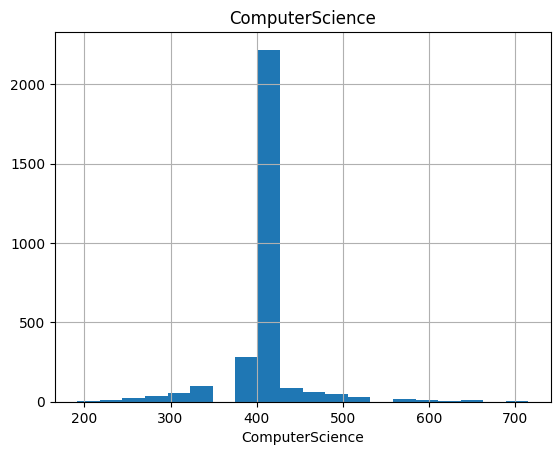

count   2797.000
mean     402.666
std       23.599
min      180.000
5%       401.645
10%      401.645
20%      401.645
30%      401.645
40%      401.645
50%      401.645
60%      401.645
70%      401.645
80%      401.645
90%      401.645
95%      401.645
99%      473.000
max      623.000
Name: MechanicalEngg, dtype: float64


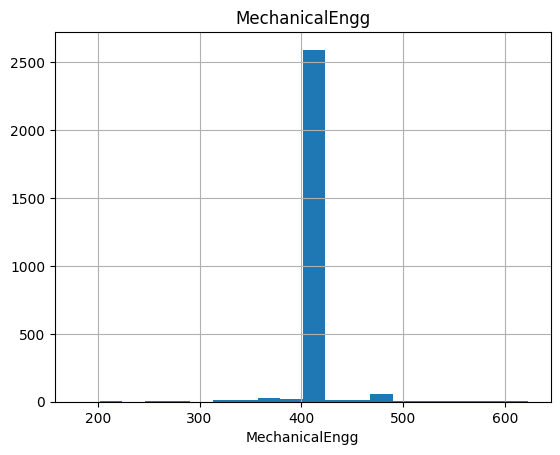

count   2757.000
mean     423.336
std       20.164
min      206.000
5%       423.336
10%      423.336
20%      423.336
30%      423.336
40%      423.336
50%      423.336
60%      423.336
70%      423.336
80%      423.336
90%      423.336
95%      423.336
99%      500.000
max      660.000
Name: ElectricalEngg, dtype: float64


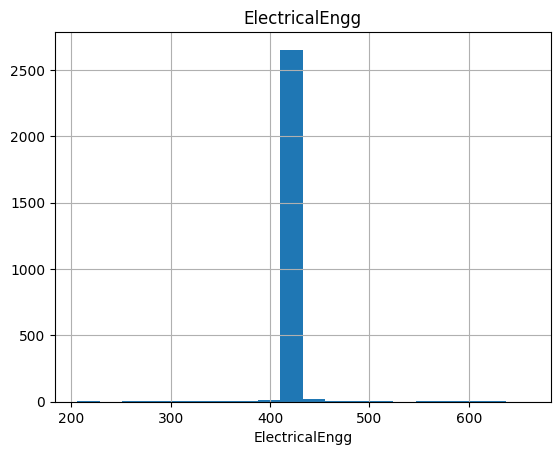

count   2797.000
mean     349.640
std       24.455
min      164.000
5%       313.000
10%      350.661
20%      350.661
30%      350.661
40%      350.661
50%      350.661
60%      350.661
70%      350.661
80%      350.661
90%      350.661
95%      350.661
99%      446.000
max      548.000
Name: TelecomEngg, dtype: float64


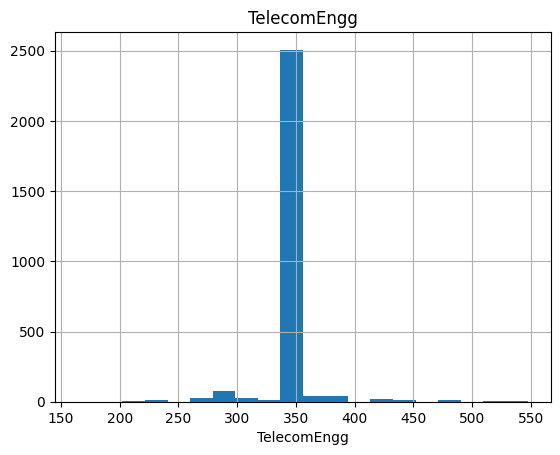

count   2797.000
mean     340.788
std       11.926
min      166.000
5%       341.960
10%      341.960
20%      341.960
30%      341.960
40%      341.960
50%      341.960
60%      341.960
70%      341.960
80%      341.960
90%      341.960
95%      341.960
99%      341.960
max      500.000
Name: CivilEngg, dtype: float64


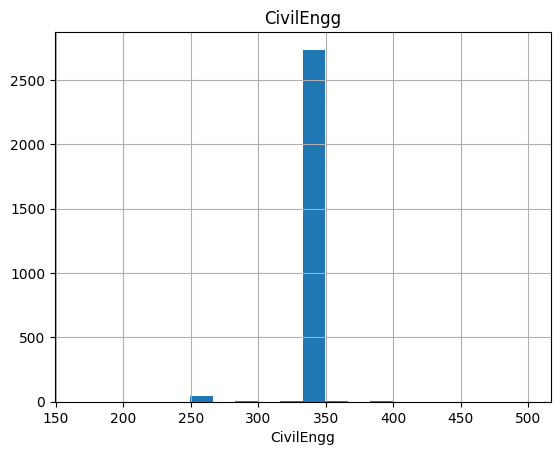

In [37]:
# List of variables you want to plot
variables = variables_to_replace

for col in variables:
    num_summary(df_logSalary, col, plot=True)

In [38]:
df_logSalary.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Graduation_age', 'Log_Salary'],
      dtype='object')

In [39]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=q1, q3=q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [40]:
columns=[col for col in df_logSalary.columns if df_logSalary[col].dtypes !="O" ]
columns=[col for col in columns if col not in minus_one_col]

In [41]:
columns

['10percentage',
 '12percentage',
 'CollegeTier',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience',
 'Age',
 'Graduation_age',
 'Log_Salary']

In [42]:
for col in columns:
    print(col, check_outlier(df_logSalary, col))
    if check_outlier(df_logSalary, col):
        replace_with_thresholds(df_logSalary, col)
print("##########")
for col in columns:
    print(col, check_outlier(df_logSalary, col))

10percentage True
12percentage True
CollegeTier True
collegeGPA True
English True
Logical True
Quant True
conscientiousness True
agreeableness True
extraversion True
nueroticism True
openess_to_experience True
Age True
Graduation_age True
Log_Salary True
##########
10percentage False
12percentage False
CollegeTier False
collegeGPA False
English False
Logical False
Quant False
conscientiousness False
agreeableness False
extraversion False
nueroticism False
openess_to_experience False
Age False
Graduation_age False
Log_Salary False


count   2998.000
mean      77.680
std        9.960
min       49.450
5%        59.000
10%       64.000
20%       69.000
30%       73.000
40%       76.000
50%       78.965
60%       81.500
70%       84.140
80%       86.818
90%       89.800
95%       91.600
99%       94.400
max       97.760
Name: 10percentage, dtype: float64


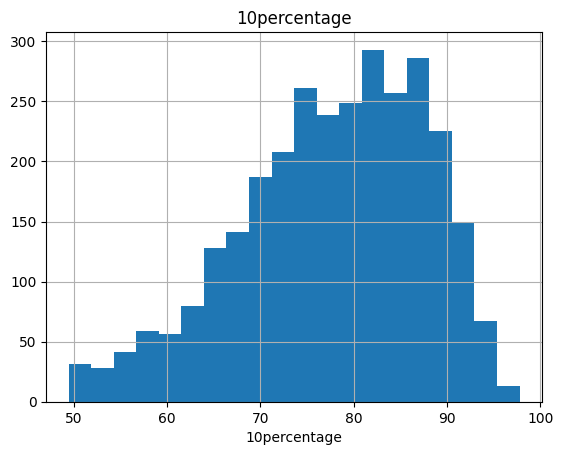

count   2998.000
mean      74.341
std       11.119
min       41.100
5%        56.000
10%       60.200
20%       64.000
30%       68.000
40%       71.000
50%       74.000
60%       77.160
70%       81.000
80%       85.000
90%       89.800
95%       93.000
99%       96.000
max       98.700
Name: 12percentage, dtype: float64


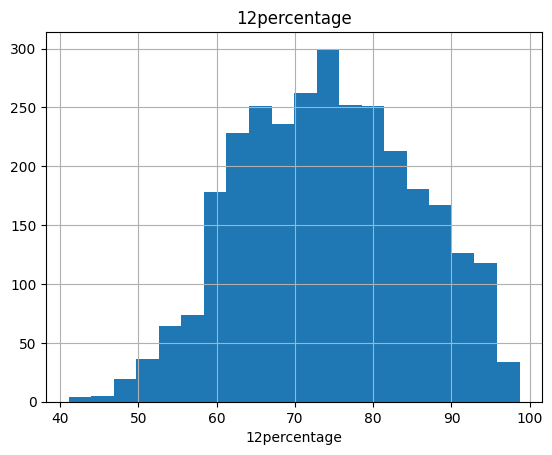

count   2998.000
mean       2.000
std        0.000
min        2.000
5%         2.000
10%        2.000
20%        2.000
30%        2.000
40%        2.000
50%        2.000
60%        2.000
70%        2.000
80%        2.000
90%        2.000
95%        2.000
99%        2.000
max        2.000
Name: CollegeTier, dtype: float64


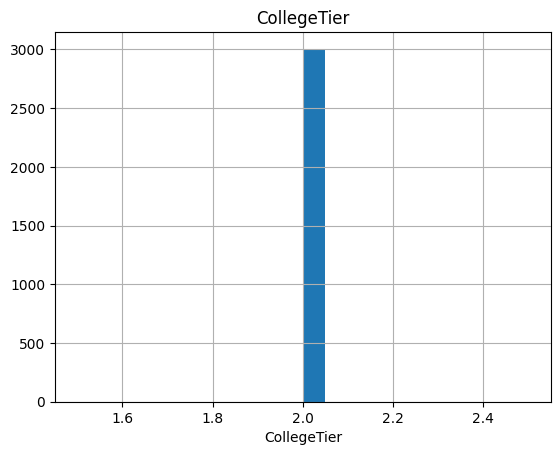

count   2998.000
mean      71.621
std        7.336
min       51.875
5%        60.000
10%       62.000
20%       65.154
30%       67.720
40%       70.000
50%       71.800
60%       73.400
70%       75.400
80%       77.700
90%       81.000
95%       84.000
99%       90.000
max       90.955
Name: collegeGPA, dtype: float64


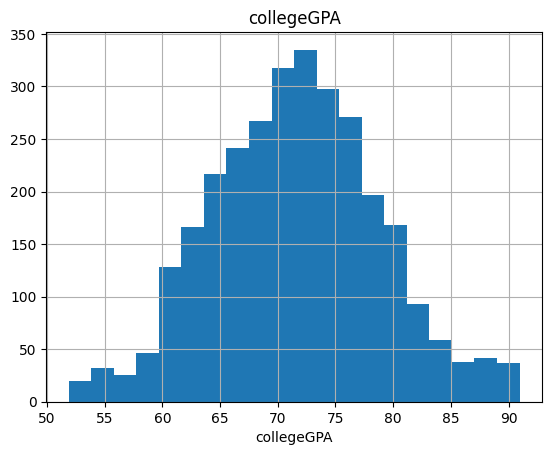

count   2998.000
mean     500.970
std      104.955
min      207.500
5%       335.000
10%      365.000
20%      405.000
30%      440.000
40%      475.000
50%      500.000
60%      525.000
70%      555.000
80%      590.000
90%      640.000
95%      675.000
99%      755.000
max      787.500
Name: English, dtype: float64


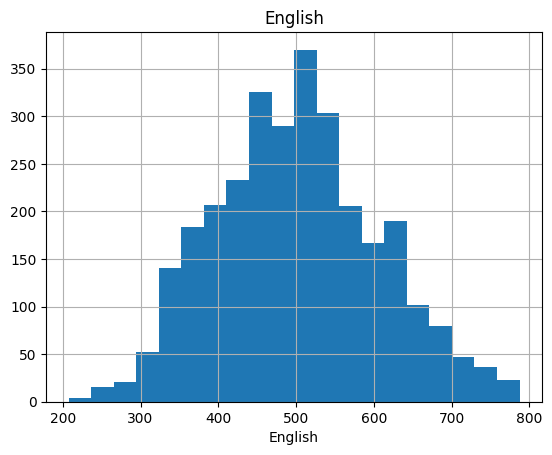

count   2998.000
mean     500.528
std       86.915
min      255.625
5%       350.000
10%      385.000
20%      425.000
30%      455.000
40%      480.000
50%      505.000
60%      525.000
70%      555.000
80%      580.000
90%      610.000
95%      640.000
99%      675.000
max      750.625
Name: Logical, dtype: float64


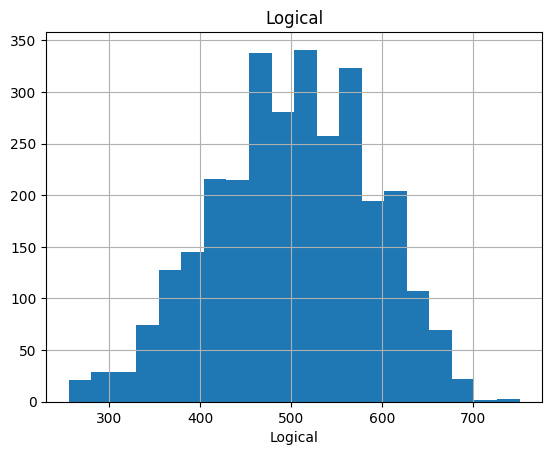

count   2998.000
mean     514.136
std      121.643
min      182.500
5%       310.000
10%      355.000
20%      405.000
30%      450.000
40%      485.000
50%      515.000
60%      545.000
70%      579.500
80%      615.000
90%      665.000
95%      715.000
99%      800.300
max      842.500
Name: Quant, dtype: float64


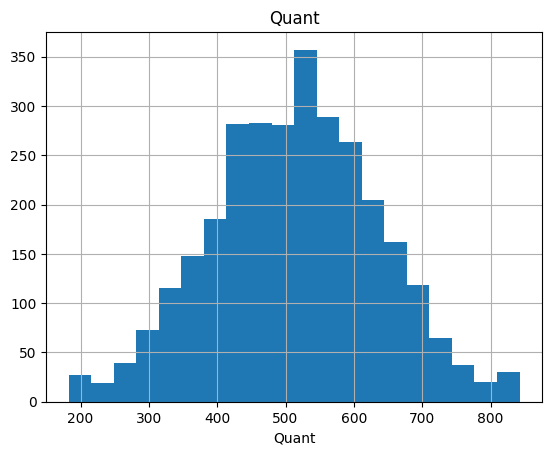

count   2998.000
mean      -0.033
std        1.007
min       -2.677
5%        -1.808
10%       -1.452
20%       -0.877
30%       -0.446
40%       -0.263
50%        0.046
60%        0.272
70%        0.559
80%        0.846
90%        1.277
95%        1.437
99%        1.852
max        1.995
Name: conscientiousness, dtype: float64


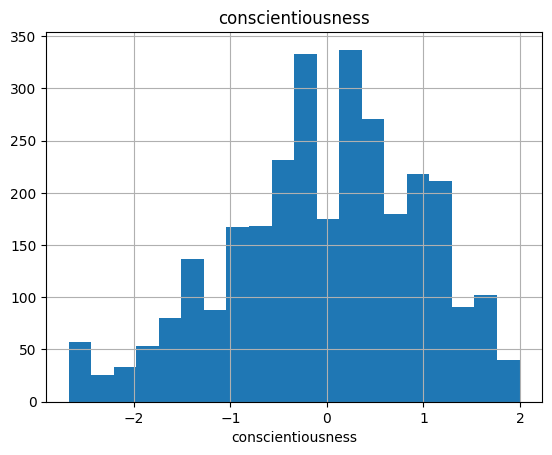

count   2998.000
mean       0.145
std        0.886
min       -2.307
5%        -1.619
10%       -1.059
20%       -0.591
30%       -0.279
40%        0.046
50%        0.212
60%        0.501
70%        0.712
80%        0.878
90%        1.211
95%        1.378
99%        1.711
max        1.905
Name: agreeableness, dtype: float64


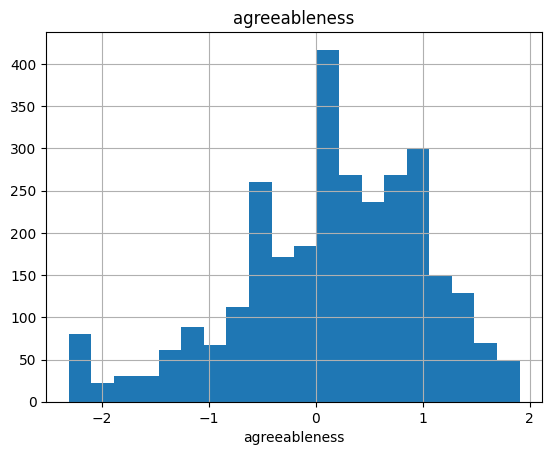

count   2998.000
mean      -0.002
std        0.941
min       -2.520
5%        -1.681
10%       -1.220
20%       -0.779
30%       -0.451
40%       -0.163
50%        0.091
60%        0.317
70%        0.527
80%        0.778
90%        1.198
95%        1.398
99%        1.978
max        2.162
Name: extraversion, dtype: float64


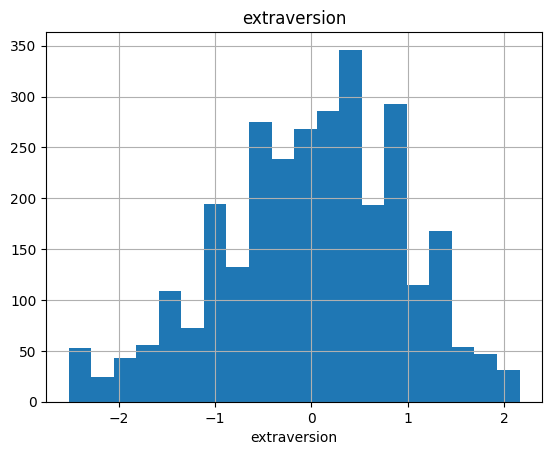

count   2998.000
mean      -0.147
std        1.009
min       -2.643
5%        -1.756
10%       -1.465
20%       -0.995
30%       -0.742
40%       -0.437
50%       -0.173
60%        0.062
70%        0.400
80%        0.767
90%        1.160
95%        1.540
99%        2.295
max        2.618
Name: nueroticism, dtype: float64


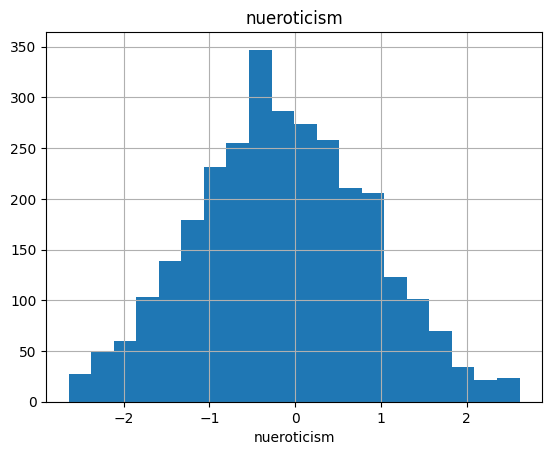

count   2998.000
mean      -0.112
std        0.896
min       -2.427
5%        -1.819
10%       -1.244
20%       -0.861
30%       -0.478
40%       -0.286
50%       -0.094
60%        0.186
70%        0.480
80%        0.672
90%        0.976
95%        1.247
99%        1.608
max        1.630
Name: openess_to_experience, dtype: float64


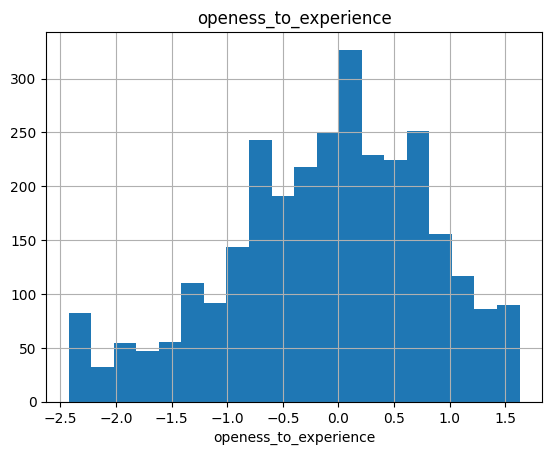

count   2998.000
mean      32.524
std        1.732
min       26.500
5%        30.000
10%       31.000
20%       31.000
30%       31.000
40%       32.000
50%       32.000
60%       33.000
70%       33.000
80%       34.000
90%       35.000
95%       36.000
99%       38.000
max       38.500
Name: Age, dtype: float64


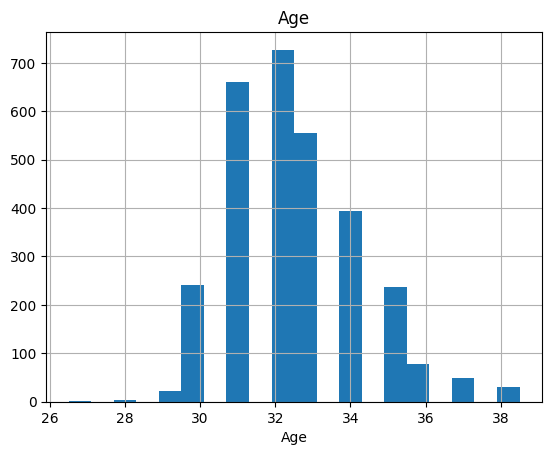

count   2998.000
mean      22.176
std        1.126
min       18.000
5%        21.000
10%       21.000
20%       21.000
30%       22.000
40%       22.000
50%       22.000
60%       22.000
70%       22.000
80%       23.000
90%       24.000
95%       24.000
99%       26.000
max       26.000
Name: Graduation_age, dtype: float64


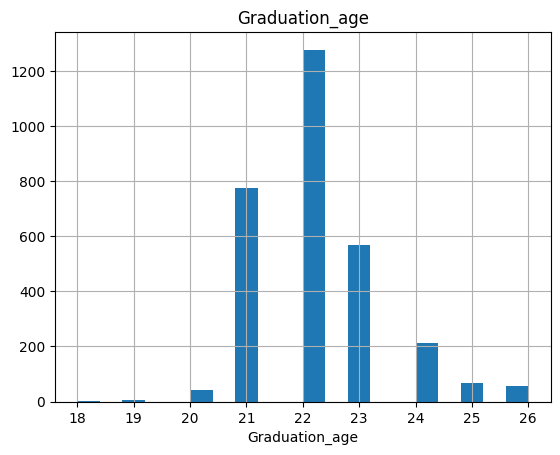

count   2998.000
mean      12.476
std        0.529
min       11.020
5%        11.513
10%       11.695
20%       12.101
30%       12.206
40%       12.388
50%       12.612
60%       12.676
70%       12.766
80%       12.899
90%       13.082
95%       13.236
99%       13.688
max       13.902
Name: Log_Salary, dtype: float64


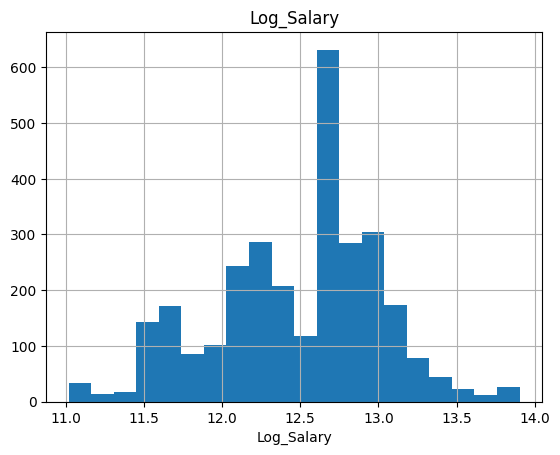

In [43]:
for col in columns:
    num_summary(df_logSalary, col, plot=True)

In [44]:
# Assuming 'minus_one_col' contains columns that need missing values handling
variables_to_replace = minus_one_col

# Loop through each variable and replace missing values with the subgroup mean
for variable in variables_to_replace:
    for col in subgroup_columns:
        for category in df_logSalary[col].unique():
            # Calculate the mean for the current category, excluding missing values
            mean_value = df_logSalary[(df_logSalary[col] == category) & (~pd.isna(df_logSalary[variable]))][variable].mean()

            # Replace missing values in the variable with the calculated mean for this category
            df_logSalary.loc[(df_logSalary[col] == category) & (pd.isna(df_logSalary[variable])), variable] = mean_value

    # Check if there are any missing values left in the variable
    remaining = pd.isna(df_logSalary[variable]).sum()
    print(f"Remaining missing values in '{variable}': {remaining}")


Remaining missing values in 'Domain': 0
Remaining missing values in 'ComputerProgramming': 0
Remaining missing values in 'ElectronicsAndSemicon': 0
Remaining missing values in 'ComputerScience': 0
Remaining missing values in 'MechanicalEngg': 0
Remaining missing values in 'ElectricalEngg': 0
Remaining missing values in 'TelecomEngg': 0
Remaining missing values in 'CivilEngg': 0


In [45]:
# Log transformation for skewed terms
# Adding a small constant to avoid taking log of zero (if there are zero salaries)
df_logSalary['Log_10perc'] = np.log(df_logSalary['10percentage'] + 1)
df_logSalary['Log_12perc'] = np.log(df_logSalary['12percentage'] + 1)

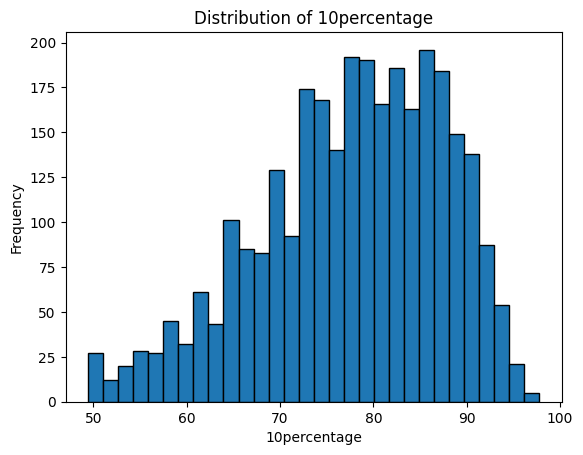

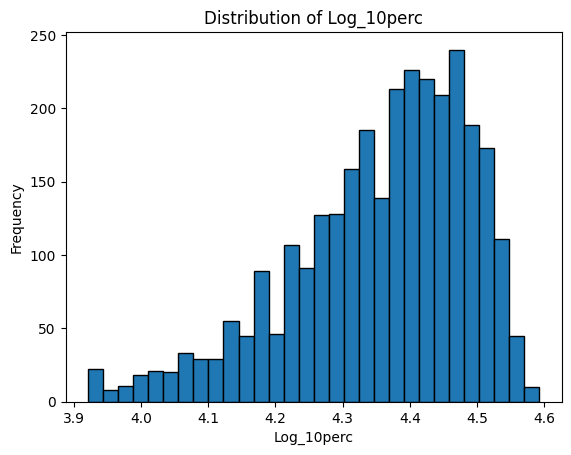

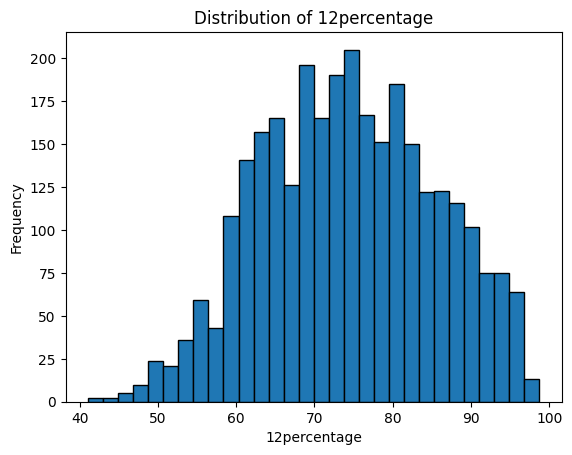

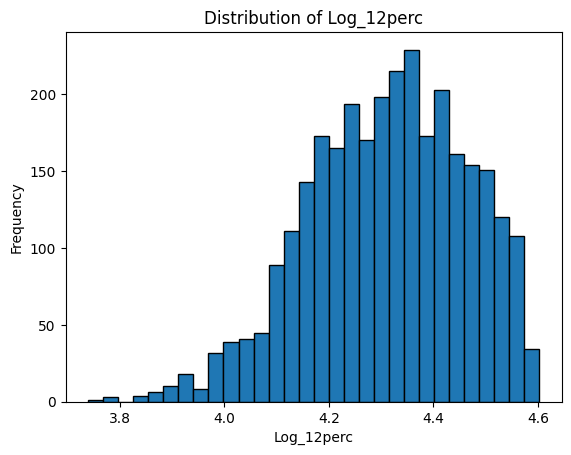

In [46]:
# plot log 10perc and 12perc
percentage_vars = ['10percentage', 'Log_10perc',
                   '12percentage', 'Log_12perc']

for col in percentage_vars:
  plt.hist(df_logSalary[col], bins=30, edgecolor='black')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [47]:
df_logSalary = df_logSalary.drop(['Log_10perc', 'Log_12perc'], axis=1)

In [48]:
cat_cols

['Gender', 'Degree', 'CollegeTier', 'Specialization']

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_logSalary.Gender = le.fit_transform(df_logSalary.Gender)
df_logSalary.Degree = le.fit_transform(df_logSalary.Degree)
df_logSalary.Specialization = le.fit_transform(df_logSalary.Specialization)

In [50]:
df_modelling = df_logSalary.copy()

In [51]:
df_modelling.isnull().sum()

Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Age                      0
Graduation_age           0
Log_Salary               0
dtype: int64

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
y = df_modelling["Log_Salary"]
X = df_modelling.drop(["Log_Salary"],axis=1)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)  # 20% of the data is used for testing

In [53]:
X_train.isnull().sum()

Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Age                      0
Graduation_age           0
dtype: int64

In [54]:
# Define XGBoost regressor and parameters for GridSearch
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
}

# GridSearchCV
xgb_grid = GridSearchCV(xgb_model, param_grid, cv=3,
                        scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='neg_mean_squared_error')

In [55]:
# Best parameters and model
best_xgb_model = xgb_grid.best_estimator_
best_xgb_params = xgb_grid.best_params_
best_xgb_score = xgb_grid.best_score_
print(f"Best parameters: {best_xgb_params}")
print(f"Best XGB Score: {best_xgb_score}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best XGB Score: -0.22340516404981905


In [56]:
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest regressor and parameters for GridSearch
rf_model = RandomForestRegressor()
rf_parameters = {'n_estimators': [100, 200, 500, 1000],
                 'max_depth': [3, 5, 7, 10]}

# GridSearchCV
rf_grid = GridSearchCV(rf_model, rf_parameters, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='neg_mean_squared_error')

In [57]:
# Best parameters and model
best_rf_model = rf_grid.best_estimator_
best_rf_params = rf_grid.best_params_
best_rf_score = rf_grid.best_score_
print(f"Best parameters: {best_rf_params}")
print(f"Best RF Score: {best_rf_score}")

Best parameters: {'max_depth': 10, 'n_estimators': 500}
Best RF Score: -0.22597957873287314


In [58]:
# from sklearn.svm import SVR

# # Define SVR model and parameters for GridSearch
# svr_model = SVR()
# parameters = {'kernel': ['linear', 'rbf'],
#               'C': [1, 10],
#               'gamma': ['scale', 'auto']}

# # GridSearchCV
# svr_grid = GridSearchCV(svr_model, parameters, cv=3, scoring='neg_mean_squared_error')
# svr_grid.fit(X_train, y_train)

In [59]:
# # Best parameters, model and score
# best_svr_model = svr_grid.best_estimator_
# best_svr_parameters = svr_grid.best_params_
# best_svr_score = svr_grid.best_score_

# print(f"Best Parameters: {best_svr_parameters}")
# print(f"Best Score: {best_svr_score}")

In [60]:
from sklearn.linear_model import ElasticNet

# Define Elastic Net model and parameters for GridSearch
elastic_net_model = ElasticNet()
elastic_net_parameters = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]
}

# GridSearchCV
elastic_net_grid = GridSearchCV(elastic_net_model, elastic_net_parameters,
                                cv=3, scoring='neg_mean_squared_error')
elastic_net_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+02, tolerance: 4.470e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.616e+02, tolerance: 4.515e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]},
             scoring='neg_mean_squared_error')

In [61]:
# Best parameters and model
best_elnet_model = elastic_net_grid.best_estimator_
best_elnet_params = elastic_net_grid.best_params_
best_elnet_score = elastic_net_grid.best_score_
print(f"Best parameters: {best_elnet_params}")
print(f"Best Score: {best_elnet_score}")

Best parameters: {'alpha': 0.001, 'l1_ratio': 1.0}
Best Score: -0.2166370176930005


In [62]:
# # Find the least negative score
# least_negative_score = max(best_elnet_score, best_xgb_score,
#                            best_rf_score, best_svr_score)

# # Determine which model it belongs to
# if least_negative_score == best_elnet_score:
#   final_model = best_elnet_model
#   print("Elastic Net has the best score:", least_negative_score)
# elif least_negative_score == best_xgb_score:
#   final_model = best_xgb_model
#   print("XGBoost has the best score:", least_negative_score)
# elif least_negative_score == best_rf_score:
#   final_model = best_rf_model
#   print("Random Forest has the best score:", least_negative_score)
# elif least_negative_score == best_svr_score:
#   final_model = best_svr_model
#   print("SVR has the best score:", least_negative_score)

# Find the least negative score
least_negative_score = max(best_elnet_score, best_xgb_score,
                           best_rf_score)

# Determine which model it belongs to
if least_negative_score == best_elnet_score:
  final_model = best_elnet_model
  print("Elastic Net has the best score:", least_negative_score)
elif least_negative_score == best_xgb_score:
  final_model = best_xgb_model
  print("XGBoost has the best score:", least_negative_score)
elif least_negative_score == best_rf_score:
  final_model = best_rf_model
  print("Random Forest has the best score:", least_negative_score)


Elastic Net has the best score: -0.2166370176930005


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predictions on the test set
y_pred = final_model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # or mse**(0.5)

print("Mean Absolute Error on the test set: ", mae)
print("Mean Squared Error on the test set: ", mse)
print("Root Mean Squared Error on the test set: ", rmse)


Mean Absolute Error on the test set:  0.3435807315999326
Mean Squared Error on the test set:  0.19370028972102726
Root Mean Squared Error on the test set:  0.44011395083662963


In [64]:
diff = y_test - y_pred

<ipython-input-65-b7386d8bf6c7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='Log_Salary', ylabel='Density'>

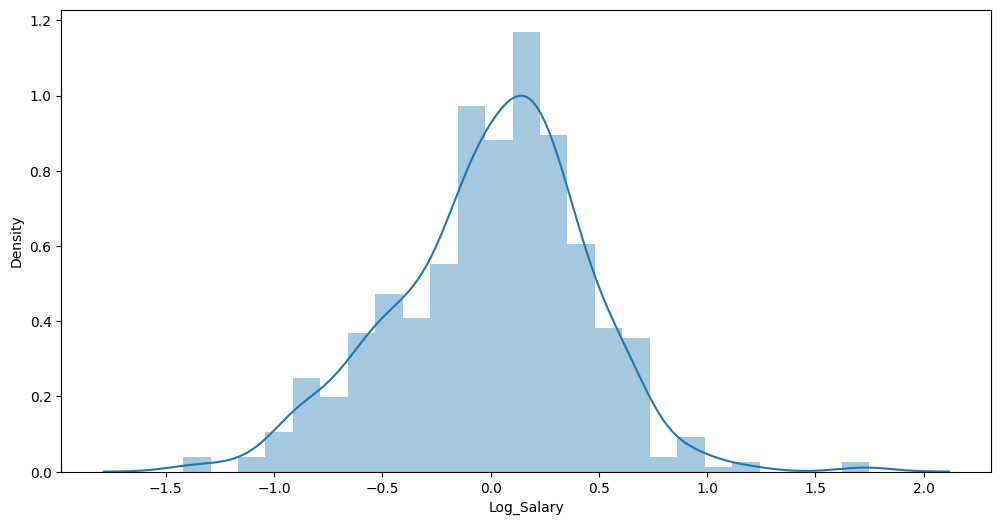

In [65]:
plt.figure(figsize = (12,6))
sns.distplot(diff)

In [66]:
final_model_score = final_model.score(X_test, y_test)
print("Final R2 Score: ", (final_model_score))

Final R2 Score:  0.265330190669098
